In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             accuracy_score, 
                             precision_score, 
                             recall_score,
                             precision_recall_curve
                            )

### Import data and examine descriptive statistics

In [3]:
df= pd.read_csv('diabetes.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Replace zeros with column median in columns in which zero shouldn't exist

In [4]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, df[col].median())
    
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df_features=df.drop('Outcome', axis=1)
X_train,X_test,y_train,y_test = train_test_split(df_features,
                                                 df.Outcome,
                                                 test_size=0.2, 
                                                 stratify= df.Outcome,
                                                 random_state= 303)

print(f'Dimensions \nTraining:{X_train.shape} \nTesting:{X_test.shape}\n')
print(f'Target Distribution')
print(f'Training \n{y_train.value_counts().sort_index()}')
print(f'Testing \n{y_test.value_counts().sort_index()}')

Dimensions 
Training:(614, 8) 
Testing:(154, 8)

Target Distribution
Training 
0    400
1    214
Name: Outcome, dtype: int64
Testing 
0    100
1     54
Name: Outcome, dtype: int64


### Model Development
- Instantiate and Fit a Logistic Regressor
- Use built-in predict() and predict_proba()

In [6]:
model_logr = LogisticRegression(max_iter=500)
model_logr.fit(X_train, y_train)


pred_df = pd.DataFrame({'actual':y_test,
                        'lr_pred':model_logr.predict(X_test), 
                        'lr_prob':model_logr.predict_proba(X_test)[:,1]
                       })

### Show the predicted probabilities for each group of true labels (0, 1)

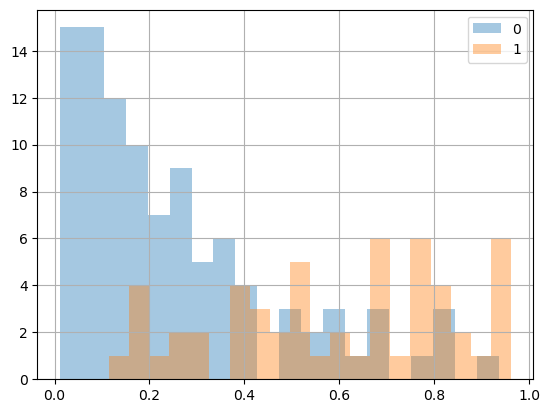

In [7]:
pred_df.groupby(['actual'])['lr_prob'].hist(bins= 20, alpha= 0.4, legend= True)
plt.show()

### Verify the built-in predict() uses a threshold of 0.5 for class assignment

In [8]:
pred_df.groupby('lr_pred')['lr_prob'].agg(['min', 'max'])

,min,max
lr_pred,,
0,0.011495,0.496983
1,0.500574,0.961600


### Show the probability distributions for each label from predict()

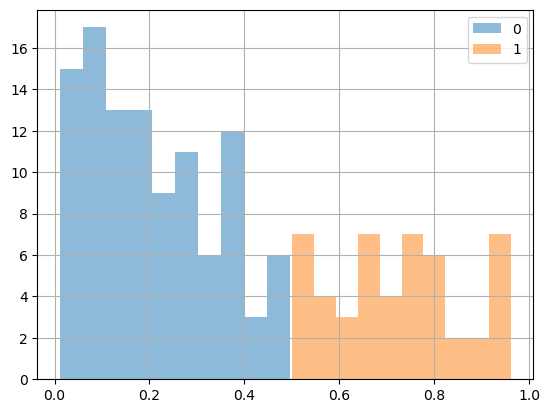

In [9]:
pred_df.groupby('lr_pred')['lr_prob'].hist(bins= 10, alpha= 0.5, legend= True)
plt.show()

### Calculate scoring metrics from built-in Predict()

In [10]:
print(f'Recall: {np.round(recall_score(y_true= pred_df.actual, y_pred= pred_df.lr_pred), 4)}')
print(f'Precision: {np.round(precision_score(y_true= pred_df.actual, y_pred= pred_df.lr_pred), 4)}')

Recall: 0.6296
Precision: 0.6939


In [11]:
prcsn, recll, thresh = precision_recall_curve(y_true= pred_df.actual, probas_pred= pred_df.lr_prob)

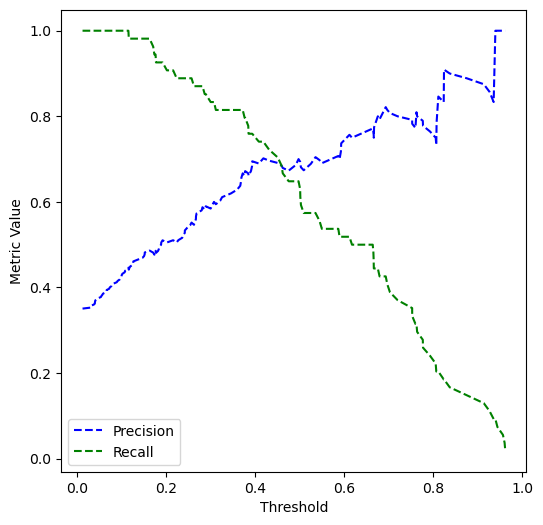

In [15]:
plt.figure(figsize= (6, 6))
plt.plot(thresh, prcsn[:-1], 'b--', label= 'Precision')
plt.plot(thresh, recll[:-1], 'g--', label= 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.show()